<a href="https://colab.research.google.com/github/TrevanMorin/Physics/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

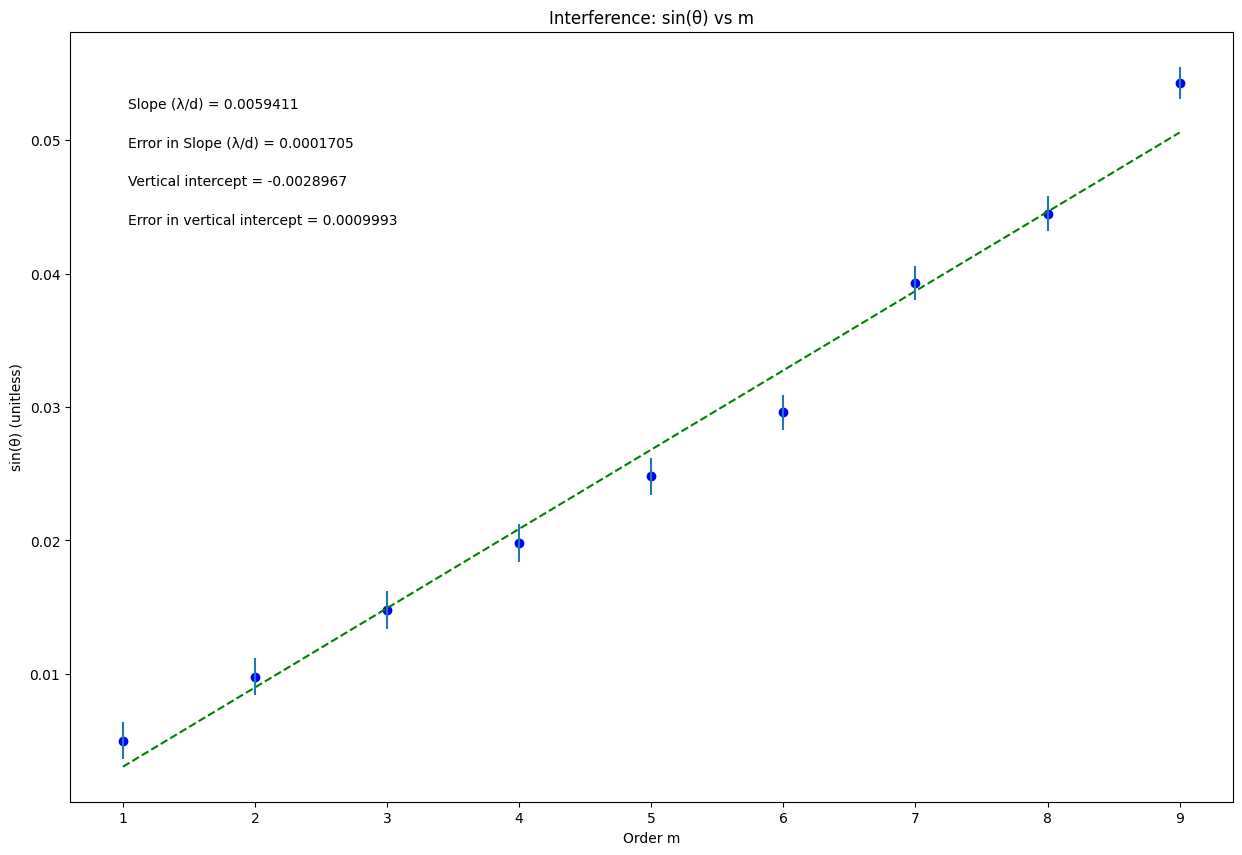

In [1]:
#PHSX 216 & 218 plotting code
#Brianna Beller
#Updated September 2023

# Import packages and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------#
#----------UPDATE THIS SECTION!!!----------

# DATA TO BE PLOTTED
xvariable_changeme = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # order m
yvariable_changeme = np.array([0.0050, 0.0098, 0.0148, 0.0198, 0.0248, 0.0296, 0.0393, 0.0445, 0.0543])  # sin(theta_m)
err_yvariable_changeme = np.array([0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013, 0.0012])  # uncertainty

# Re-assign to generic plotting variables
x = xvariable_changeme
y = yvariable_changeme
dy = err_yvariable_changeme

# UPDATE LABELS
plot_title = 'Interference: sin(θ) vs m'
x_label = 'Order m'
y_label = 'sin(θ) (unitless)'
slope_units = 'λ/d'

annotation_placement = 2

#-----------------------------------------------------------------------#
#-----DON'T NEED TO CHANGE ANYTHING BEYOND THIS POINT-----

b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
fit = b + m * x

def Delta(x, dy):
    return (sum(1 / dy**2)) * (sum(x**2 / dy**2)) - (sum(x / dy**2))**2

D = Delta(x, dy)
dm = np.sqrt(1 / D * sum(1 / dy**2))
db = np.sqrt(1 / D * sum(x**2 / dy**2))

def LLSFD2(x, y, dy):
    return sum(((y - b - m * x) / dy)**2)

N = LLSFD2(x, y, dy)

if annotation_placement in [2, 3]:
    xpos = 0.05
else:
    xpos = 0.75

if annotation_placement in [1, 2]:
    ypos = [.9, .85, .8, .75]
else:
    ypos = [.2, .15, .1, .05]

# Plot
plt.figure(figsize=(15, 10))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
plt.errorbar(x, y, yerr=dy, fmt="none")

plt.annotate('Slope ({}) = {:.7f}'.format(slope_units, m), (xpos, ypos[0]), xycoords='axes fraction')
plt.annotate('Error in Slope ({}) = {:.7f}'.format(slope_units, dm), (xpos, ypos[1]), xycoords='axes fraction')
plt.annotate('Vertical intercept = {:.7f}'.format(b), (xpos, ypos[2]), xycoords='axes fraction')
plt.annotate('Error in vertical intercept = {:.7f}'.format(db), (xpos, ypos[3]), xycoords='axes fraction')

plt.show()
